In [2]:
import numpy as np
import torch as torch
import torchgmm as gmm
import dgp
from scipy.stats import distributions as iid
from numpy.linalg import inv
import matplotlib.pyplot as plt
import networkx as nx


In [3]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

    
t_type = torch.float64
gmm_steps = 2
dgp_obj = dgp.dgp(1, 10000, t_type, device)
dgp_obj_large_n = dgp.dgp(1, 100000, t_type, device)

# Part (3)

### Part (a)

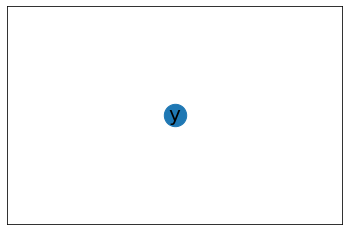

In [4]:
## Part b
# Note that we are leaving out the constant
graph = nx.Graph()
graph.add_node("y")
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [5]:
# Part (a)
beta_true = np.array([5, 10]).reshape(-1,1)
data      = dgp_obj.part_a(beta_true[0,0], beta_true[1,0])
moment_f  = dgp.moment_functions("a") 
n_m       = 3
b_est, weights, _ = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type, 
                                     f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data, f_m=moment_f)))

GMM-1 loss: 1.716125
GMM-2 loss: 1.003800
Estimated values:  [5.03054354 9.96644537]
True values:  [ 5 10]
Optimal weights using estimated beta: 
 tensor([[ 2.4968e-01,  1.7769e-03, -4.9508e-03],
        [ 1.7769e-03,  4.9864e-03, -7.1912e-05],
        [-4.9508e-03, -7.1912e-05,  1.6405e-04]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 2.4946e-01,  1.9253e-03, -4.9459e-03],
        [ 1.9253e-03,  5.0009e-03, -8.6944e-05],
        [-4.9459e-03, -8.6944e-05,  1.6405e-04]], dtype=torch.float64)


### Part (b)

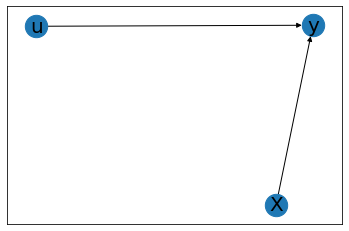

In [6]:
## Part b
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [7]:
# Part (b)
beta_true = np.array([2, 4]).reshape(-1,1)
data      = dgp_obj.part_b_c(beta_true)
moment_f  = dgp.moment_functions("b") 
n_m       = 2

b_est, weights, _ = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data)))

GMM-1 loss: 0.000000
GMM-2 loss: 0.000000
Estimated values:  [2.00968445 3.98955834]
True values:  [2 4]
Optimal weights using estimated beta: 
 tensor([[1.0025, 0.0025],
        [0.0025, 1.0158]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[1.0024, 0.0023],
        [0.0023, 1.0152]], dtype=torch.float64)


### Part (c)

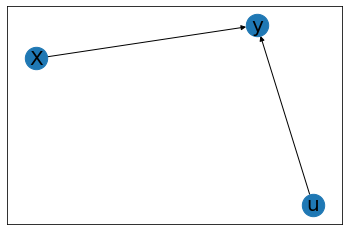

In [8]:
## Part c
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [9]:
# Part (c)
beta_true = np.array([2, 4, 3]).reshape(-1,1)
data      = dgp_obj.part_b_c(beta_true[:2], s2=beta_true[2]) # introducing some variance
moment_f  = dgp.moment_functions("c") 
n_m       = 3

b_est, weights, _ = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data,
                                                                      f_m=moment_f)))

GMM-1 loss: 0.000000
GMM-2 loss: 0.000000
Estimated values:  [2.01677395 3.98191452 2.99239723]
True values:  [2 4 3]
Optimal weights using estimated beta: 
 tensor([[ 0.3343,  0.0007, -0.0024],
        [ 0.0007,  0.3388,  0.0033],
        [-0.0024,  0.0033,  0.0551]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 0.3345,  0.0004, -0.0042],
        [ 0.0004,  0.3389,  0.0052],
        [-0.0042,  0.0052,  0.0551]], dtype=torch.float64)


### Part (d)

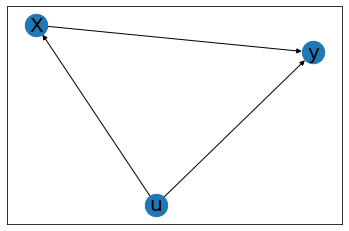

In [10]:
## Part d
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y"), ("u","X")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [11]:
beta_true = np.array([2, 4, 3]).reshape(-1,1)
data      = dgp_obj.part_d(beta_true[:2], s2=beta_true[2]) # introducing some variance
moment_f  = dgp.moment_functions("d") 
n_m       = 3

b_est, weights, _ = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data,
                                                            f_m=moment_f)))

GMM-1 loss: 0.000000
GMM-2 loss: 0.000000
Estimated values:  [1.88739056 3.65558888 3.0093874 ]
True values:  [2 4 3]
Optimal weights using estimated beta: 
 tensor([[ 2.0453e-01, -7.5101e-02, -1.4244e-04],
        [-7.5101e-02,  2.9742e-02,  7.4557e-05],
        [-1.4244e-04,  7.4557e-05,  1.4982e-06]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 2.1008e-01, -7.7358e-02, -1.5098e-04],
        [-7.7358e-02,  3.0698e-02,  7.9756e-05],
        [-1.5098e-04,  7.9756e-05,  1.5456e-06]], dtype=torch.float64)


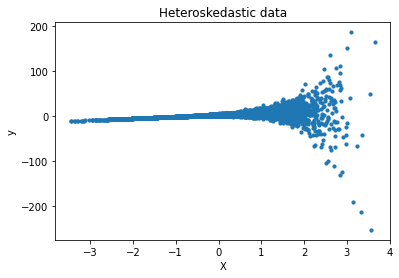

In [12]:
plt.scatter(data[1][:,1],data[0], s=10)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Heteroskedastic data")
plt.show()

### Part (e)

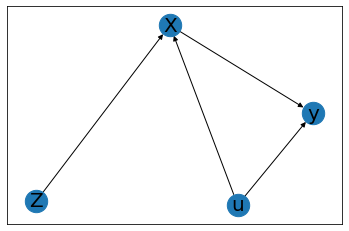

In [13]:
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y"),("u","X"), ("Z","X")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [14]:
beta_true = np.array([2, 4]).reshape(-1,1)
data, covXZu = dgp_obj.part_e(beta_true) # introducing some variance
moment_f  = dgp.moment_functions("e") 
n_m       = 3

b_est, weights, _ = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data,
                                                                      f_m=moment_f)))

GMM-1 loss: 1.694192
GMM-2 loss: 1.442819
Estimated values:  [1.98195356 4.02077734]
True values:  [2 4]
Optimal weights using estimated beta: 
 tensor([[ 0.0999, -0.0125, -0.0756],
        [-0.0125,  0.1549,  0.0110],
        [-0.0756,  0.0110,  0.3900]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 0.0993, -0.0124, -0.0753],
        [-0.0124,  0.1539,  0.0110],
        [-0.0753,  0.0110,  0.3878]], dtype=torch.float64)


### Part (f)

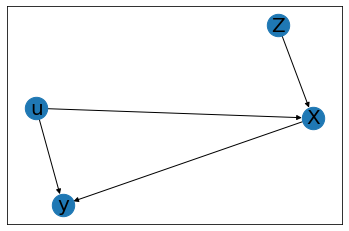

In [15]:
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y"),("u","X"), ("Z","X")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [16]:
beta_true = np.array([2, 4]).reshape(-1,1)
data, covXZu = dgp_obj.part_f(beta_true, f=lambda x: 2*torch.exp(x)) 
moment_f  = dgp.moment_functions("f") 
n_m       = 3

b_est, weights, _ = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data,
                                                                      f_m=moment_f)))

GMM-1 loss: 7.127008
GMM-2 loss: 6.929161
Estimated values:  [2.06390358 3.98918574]
True values:  [2 4]
Optimal weights using estimated beta: 
 tensor([[ 2.9323e-15,  3.4385e-15, -7.6536e-15],
        [ 3.4385e-15,  1.0481e-14, -1.8347e-14],
        [-7.6536e-15, -1.8347e-14,  3.4973e-14]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 0.0993, -0.0124, -0.0753],
        [-0.0124,  0.1539,  0.0110],
        [-0.0753,  0.0110,  0.3878]], dtype=torch.float64)


### Part (g)

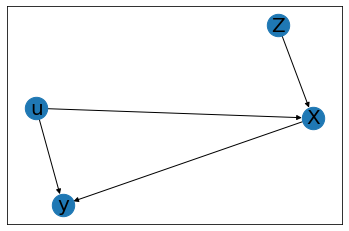

In [17]:
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("X","y"),("u","y"),("u","X"), ("Z","X")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [18]:
beta_true = np.array([2, 4]).reshape(-1,1)
data, covXZu = dgp_obj.part_g(beta_true, f=lambda x, b: x**2 @ b**2) 
moment_f  = dgp.moment_functions("g") 
n_m       = 3

b_est, weights, _ = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                    f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data,
                                                                      f_m=moment_f)))

GMM-1 loss: 1.615263
GMM-2 loss: 1.396342
Estimated values:  [1.98089822 4.00325066]
True values:  [2 4]
Optimal weights using estimated beta: 
 tensor([[ 0.0996, -0.0124, -0.0747],
        [-0.0124,  0.1545,  0.0115],
        [-0.0747,  0.0115,  0.3878]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 0.0993, -0.0124, -0.0753],
        [-0.0124,  0.1539,  0.0110],
        [-0.0753,  0.0110,  0.3878]], dtype=torch.float64)


### Part (h)

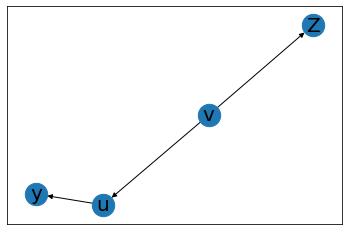

In [19]:
# Note that we are leaving out the constant
graph = nx.DiGraph()
graph.add_edges_from([("v","u"),("v","Z"),("u","y")])
nx.draw_networkx(graph, arrows=True, node_size=500, font_size=20)
plt.show()

In [18]:
# Part (a)
beta_true = np.array([3., 1.]).reshape(-1,1)
data      = dgp_obj_large_n.part_h(alpha=beta_true[1,0],gamma=beta_true[0,0])
moment_f  = dgp.moment_functions("h") 
n_m       = 2
b_est, weights, _ = gmm.solve_kstep_GMM(gmm_steps, beta_true*.5, data, n_m, device, t_type, 
                                     f_m=moment_f)

print("Estimated values: ", b_est.detach().numpy().flatten())
print("True values: ", beta_true.flatten())
print("Optimal weights using estimated beta: \n",weights)
print("Optimal weights using true beta: \n",torch.inverse(gmm.Omegahat(beta_true, data, f_m=moment_f)))

GMM-1 loss: 0.000000
GMM-2 loss: 0.000000
Estimated values:  [3.04049379 0.99994281]
True values:  [3. 1.]
Optimal weights using estimated beta: 
 tensor([[ 216.9298, -168.7208],
        [-168.7208,  138.0143]], dtype=torch.float64)
Optimal weights using true beta: 
 tensor([[ 222.2825, -172.9614],
        [-172.9614,  141.5342]], dtype=torch.float64)


# Part (4)

In [19]:
gmm_steps = 2

n_draw_list = [10,100,1000]
n_trials    = 2000
b_est_list  = np.zeros((len(n_draw_list), n_trials, 2))
J_est_list  = np.zeros((len(n_draw_list), n_trials))

for j, n in enumerate(n_draw_list):
    print("Running trials for n={}".format(n))
    for i in range(n_trials):
        dgp_obj     = dgp.dgp(1+i, n, t_type, device)
        # beta_true   = np.array([2, 4]).reshape(-1,1)
        # data,covXZu = dgp_obj.part_f(beta_true, f=lambda x: 2*torch.exp(x))  # introducing some variance
        # moment_f    = dgp.moment_functions("f") 
        # n_m         = 3

        beta_true = np.array([2, 4]).reshape(-1,1)
        data, covXZu = dgp_obj.part_e(beta_true) # introducing some variance
        moment_f  = dgp.moment_functions("e") 
        n_m       = 3

        b_est, weights, obj = gmm.solve_kstep_GMM(gmm_steps, beta_true*.1, data, n_m, device, t_type,
                                            f_m=moment_f, final_verbose=False)

        b_est_list[j,i,:] = b_est.flatten()
        J_est_list[j,i]   = obj


Running trials for n=10
Running trials for n=100
Running trials for n=1000


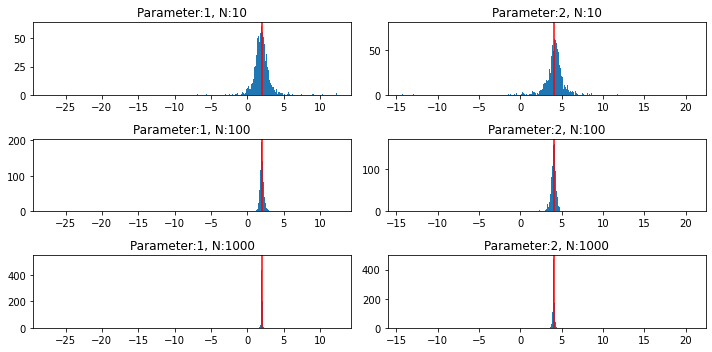

In [20]:
fig, ax = plt.subplots(3, 2, figsize=(10, 5))
binwidth=0.05

for j in range(3):
    for i in range(2):
        data_temp = b_est_list[j,:,i]
        data_temp = data_temp[~np.isnan(data_temp)]
        min_bin = b_est_list[:,:,i].min()
        max_bin = b_est_list[:,:,i].max()
        ax[j,i].hist(data_temp, bins=np.arange(min_bin, max_bin + binwidth, binwidth))
        ax[j,i].axvline(x=beta_true[i], color='r')
        ax[j,i].set_title("Parameter:{}, N:{}".format(i+1, n_draw_list[j]))
#         ax[0].set_xlabel("Intersect estimates")

fig.tight_layout()
plt.show()

In [21]:
def ppplot(data_diff_n,dist, n_list):
    data_diff_n = np.array(data_diff_n)
    n_n = data_diff_n.shape[0]
    fig, ax = plt.subplots(1, n_n, figsize=(15, 5))
    for i in range(n_n):
        data = data_diff_n[i,:]
        # Theoretical CDF, evaluated at points of data
        P = [dist.cdf(x) for x in data.tolist()]

        # Empirical CDF, evaluated at points of data
        Phat = [(data<x).mean() for x in data.tolist()]


        ax[i].scatter(P,Phat,s=1)
        ax[i].plot([0,1],[0,1],color='r') # Plot 45
        ax[i].set_xlabel('Theoretical Distribution')
        ax[0].set_ylabel('Empirical Distribution')
        ax[i].set_title('p-p Plot for n={}'.format(n_list[i]))

    return ax
    

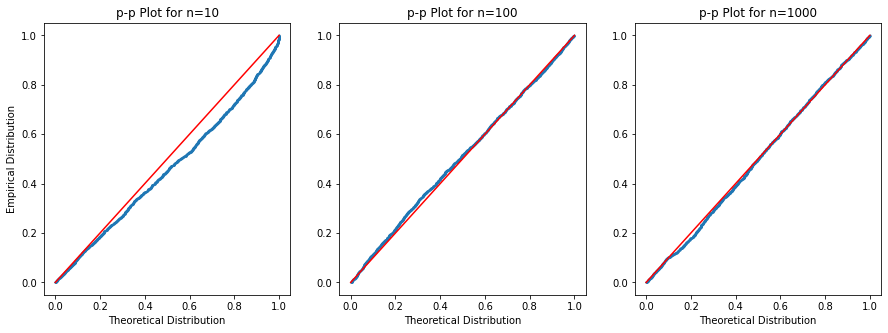

In [22]:
limiting_J = iid.chi2(n_m-beta_true.shape[0])
ax = ppplot(J_est_list, limiting_J,n_draw_list)